## Setting

In [6]:
import numpy as np
import pandas as pd

In [7]:
data_df = pd.read_csv('./22-2-dataanalysis-clustering/Health_Condition_Level.csv')

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DFC                 1839 non-null   float64
 1   Lifestyle_feature1  1839 non-null   int64  
 2   SC                  1839 non-null   object 
 3   EF                  1839 non-null   float64
 4   FI                  1839 non-null   float64
 5   Height              1839 non-null   float64
 6   Smoker              1839 non-null   object 
 7   Medical_history     1839 non-null   object 
 8   Lifestyle_feature3  1839 non-null   int64  
 9   Weight              1839 non-null   float64
 10  Lifestyle_feature2  1839 non-null   float64
 11  Age                 1839 non-null   float64
 12  AC                  1839 non-null   object 
 13  EDUT                1839 non-null   float64
 14  HSM                 1839 non-null   object 
 15  Lifestyle_feature4  1839 non-null   float64
 16  Sex   

In [4]:
data_df.head()

,DFC,Lifestyle_feature1,SC,EF,FI,Height,Smoker,Medical_history,Lifestyle_feature3,Weight,Lifestyle_feature2,Age,AC,EDUT,HSM,Lifestyle_feature4,Sex
0,3.000000,1,Sometimes,0.108386,1.020313,1.610126,no,yes,0,102.686908,3.000000,25.999636,Sometimes,1.000000,no,12.217263,Female
1,3.000000,1,Sometimes,0.005939,1.000536,1.596813,no,yes,0,102.320437,3.000000,25.940153,Sometimes,0.566353,no,5.545356,Female
2,3.000000,1,Sometimes,0.427905,2.404049,1.803677,no,yes,0,160.639405,3.000000,21.521294,Sometimes,0.639894,no,5.734039,Female
3,2.649406,1,Sometimes,0.216908,1.153286,1.690262,no,yes,0,103.180918,1.120102,26.624342,no,0.619012,no,3.585988,Male
4,2.317734,1,Sometimes,0.000000,2.152736,1.755926,no,yes,2,112.289883,3.000000,30.200946,no,1.108145,no,6.863801,Male


## K-Means Clustering

In [8]:
from sklearn.cluster import KMeans

# numerical
numerical_list = ['Lifestyle_feature2', 'Lifestyle_feature4', 'Height', 'Weight', 'Age', 'DFC', 'EF', 'FI', 'EDUT']

#categorical
categorical_list = ['Lifestyle_feature1', 'Lifestyle_feature3', 'Smoker', 'Medical_history', 'Sex', 'SC', 'AC', 'HSM']

In [178]:
def catToNum(x):
    if x == 'no':
        return 0
    elif x == 'Sometimes':
        return 1
    elif x == 'Frequently':
        return 2
    else:
        return 3

In [179]:
data_df['Smoker'] = data_df['Smoker'].apply(lambda x: 0 if x == 'no' else 1)
data_df['Medical_history'] = data_df['Medical_history'].apply(
    lambda x: 0 if x == 'no' else 1)
data_df['HSM'] = data_df['HSM'].apply(lambda x: 0 if x == 'no' else 1)
data_df['Sex'] = data_df['Sex'].apply(lambda x: 0 if x == 'Male' else 1)
data_df['SC'] = data_df['SC'].apply(lambda x: catToNum(x))
data_df['AC'] = data_df['AC'].apply(lambda x: catToNum(x))

In [93]:
attr_list_1 = ['Weight', 'Age', 'EF']


In [88]:
attr_list_2 = ['Lifestyle_feature1', 'Lifestyle_feature2',
               'Lifestyle_feature3', 'Lifestyle_feature4', 'Height', 'Weight', 'Age', 'DFC', 'EF', 'FI', 'EDUT']


In [9]:
numerical_df = pd.DataFrame(data=data_df, columns=numerical_list)


In [97]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lifestyle_feature2  1839 non-null   float64
 1   Lifestyle_feature4  1839 non-null   float64
 2   Height              1839 non-null   float64
 3   Weight              1839 non-null   float64
 4   Age                 1839 non-null   float64
 5   DFC                 1839 non-null   float64
 6   EF                  1839 non-null   float64
 7   FI                  1839 non-null   float64
 8   EDUT                1839 non-null   float64
dtypes: float64(9)
memory usage: 129.4 KB


### 아래 코드로 submission하였습니다!

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(numerical_df)

label_df = pd.DataFrame(kmeans.labels_)

submission_df = pd.DataFrame()

submission_df['id'] = np.arange(1839)
submission_df['predict'] = kmeans.labels_

submission_df.to_csv('./submissions/CLST_KM_n3.csv', index=False)


In [20]:
print(submission_df.groupby(['predict']).count())

          id
predict     
0        702
1        417
2        720


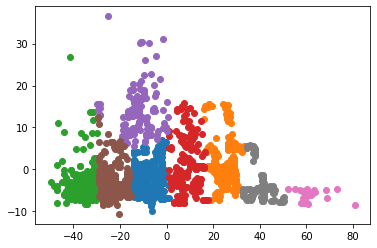

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pcd_df = numerical_df
pcd_df['cluster'] = kmeans.labels_

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(pcd_df)

pcd_df['pca_x'] = pca_transformed[:, 0]
pcd_df['pca_y'] = pca_transformed[:, 1]

maker0_ind = pcd_df[pcd_df['cluster'] == 0].index
maker1_ind = pcd_df[pcd_df['cluster'] == 1].index
maker2_ind = pcd_df[pcd_df['cluster'] == 2].index
maker3_ind = pcd_df[pcd_df['cluster'] == 3].index
maker4_ind = pcd_df[pcd_df['cluster'] == 4].index
maker5_ind = pcd_df[pcd_df['cluster'] == 5].index
maker6_ind = pcd_df[pcd_df['cluster'] == 6].index
maker7_ind = pcd_df[pcd_df['cluster'] == 7].index

plt.scatter(x=pcd_df.loc[maker0_ind, 'pca_x'],
            y=pcd_df.loc[maker0_ind, 'pca_y'])
plt.scatter(x=pcd_df.loc[maker1_ind, 'pca_x'],
            y=pcd_df.loc[maker1_ind, 'pca_y'])
plt.scatter(x=pcd_df.loc[maker2_ind,'pca_x'], 
            y=pcd_df.loc[maker2_ind, 'pca_y'])
plt.scatter(x=pcd_df.loc[maker3_ind, 'pca_x'],
            y=pcd_df.loc[maker3_ind, 'pca_y'])
plt.scatter(x=pcd_df.loc[maker4_ind, 'pca_x'],
            y=pcd_df.loc[maker4_ind, 'pca_y'])
plt.scatter(x=pcd_df.loc[maker5_ind, 'pca_x'],
            y=pcd_df.loc[maker5_ind, 'pca_y'])
plt.scatter(x=pcd_df.loc[maker6_ind, 'pca_x'],
            y=pcd_df.loc[maker6_ind, 'pca_y'])
plt.scatter(x=pcd_df.loc[maker7_ind, 'pca_x'],
            y=pcd_df.loc[maker7_ind, 'pca_y'])

plt.show()

In [21]:
data_df['Smoker'] = data_df['Smoker'].apply(lambda x: 0 if x is 'no' else 1)
data_df['Medical_history'] = data_df['Medical_history'].apply(lambda x: 0 if x is 'no' else 1)
data_df['HSM'] = data_df['HSM'].apply(lambda x: 0 if x is 'no' else 1)

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/ln/5crzqg4144jgkv82ryrmmdz00000gn/T/ipykernel_16911/1403384588.py:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  data_df['Smoker'] = data_df['Smoker'].apply(lambda x: 0 if x is 'no' else 1)
/var/folders/ln/5crzqg4144jgkv82ryrmmdz00000gn/T/ipykernel_16911/1403384588.py:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  data_df['Medical_history'] = data_df['Medical_history'].apply(lambda x: 0 if x is 'no' else 1)
/var/folders/ln/5crzqg4144jgkv82ryrmmdz00000gn/T/ipykernel_16911/1403384588.py:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  data_df['HSM'] = data_df['HSM'].apply(lambda 

In [24]:
def catToNum(x):
    if x == 'no':
        return 0
    elif x == 'Sometimes':
        return 1
    elif x == 'Frequently':
        return 2
    else:
        return 3

In [25]:
data_df['Sex'] = data_df['Sex'].apply(lambda x: 0 if x == 'Male' else 1)
data_df['SC'] = data_df['SC'].apply(lambda x: catToNum(x))
data_df['AC'] = data_df['AC'].apply(lambda x: catToNum(x))

### data preprocessing -> KMeans

In [26]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DFC                 1839 non-null   float64
 1   Lifestyle_feature1  1839 non-null   int64  
 2   SC                  1839 non-null   int64  
 3   EF                  1839 non-null   float64
 4   FI                  1839 non-null   float64
 5   Height              1839 non-null   float64
 6   Smoker              1839 non-null   int64  
 7   Medical_history     1839 non-null   int64  
 8   Lifestyle_feature3  1839 non-null   int64  
 9   Weight              1839 non-null   float64
 10  Lifestyle_feature2  1839 non-null   float64
 11  Age                 1839 non-null   float64
 12  AC                  1839 non-null   int64  
 13  EDUT                1839 non-null   float64
 14  HSM                 1839 non-null   int64  
 15  Lifestyle_feature4  1839 non-null   float64
 16  Sex   

In [27]:
kmeans = KMeans()
kmeans.fit(data_df)

KMeans()

In [28]:
submission_df = pd.DataFrame()

submission_df['id'] = np.arange(1839)
submission_df['predict'] = kmeans.labels_

submission_df.to_csv('./submissions/CLST__prep_KM.csv', index=False)

In [30]:
label_df = pd.DataFrame(kmeans.labels_)

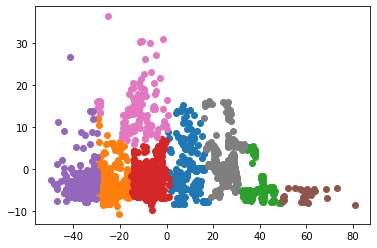

In [29]:
label_df = pd.DataFrame(kmeans.labels_)

pcd_df = data_df
pcd_df['cluster'] = kmeans.labels_

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data_df)

pcd_df['pca_x'] = pca_transformed[:, 0]
pcd_df['pca_y'] = pca_transformed[:, 1]

maker0_ind = pcd_df[pcd_df['cluster'] == 0].index
maker1_ind = pcd_df[pcd_df['cluster'] == 1].index
maker2_ind = pcd_df[pcd_df['cluster'] == 2].index
maker3_ind = pcd_df[pcd_df['cluster'] == 3].index
maker4_ind = pcd_df[pcd_df['cluster'] == 4].index
maker5_ind = pcd_df[pcd_df['cluster'] == 5].index
maker6_ind = pcd_df[pcd_df['cluster'] == 6].index
maker7_ind = pcd_df[pcd_df['cluster'] == 7].index

plt.scatter(x=pcd_df.loc[maker0_ind, 'pca_x'],
            y=pcd_df.loc[maker0_ind, 'pca_y'])
plt.scatter(x=pcd_df.loc[maker1_ind, 'pca_x'],
            y=pcd_df.loc[maker1_ind, 'pca_y'])
plt.scatter(x=pcd_df.loc[maker2_ind, 'pca_x'],
            y=pcd_df.loc[maker2_ind, 'pca_y'])
plt.scatter(x=pcd_df.loc[maker3_ind, 'pca_x'],
            y=pcd_df.loc[maker3_ind, 'pca_y'])
plt.scatter(x=pcd_df.loc[maker4_ind, 'pca_x'],
            y=pcd_df.loc[maker4_ind, 'pca_y'])
plt.scatter(x=pcd_df.loc[maker5_ind, 'pca_x'],
            y=pcd_df.loc[maker5_ind, 'pca_y'])
plt.scatter(x=pcd_df.loc[maker6_ind, 'pca_x'],
            y=pcd_df.loc[maker6_ind, 'pca_y'])
plt.scatter(x=pcd_df.loc[maker7_ind, 'pca_x'],
            y=pcd_df.loc[maker7_ind, 'pca_y'])

plt.show()


## DBSCAN

In [98]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=2, eps=7)
dbscan.fit(data_df)

prediction_df = dbscan.fit_predict(numerical_df)

submission_df = pd.DataFrame()

submission_df['id'] = np.arange(1839)
submission_df['predict'] = prediction_df

submission_df.to_csv('./submissions/CLST_DBSCAN_MS2_E7.csv', index=False)

In [99]:
print(submission_df.groupby(['predict']).count())

           id
predict      
-1          3
 0       1834
 1          2


## Gaussian mixture

In [130]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=7).fit(numerical_df)

prediction_df = gm.predict(numerical_df)

submission_df = pd.DataFrame()

submission_df['id'] = np.arange(1839)
submission_df['predict'] = prediction_df

submission_df.to_csv('./submissions/CLST_GM_n7.csv', index=False)


In [131]:
print(submission_df.groupby(['predict']).count())

          id
predict     
0        791
1         99
2        152
3         51
4        207
5        218
6        321


## Birch

In [147]:
def changeLabel(x):
    if x == 0:
        return 1
    elif x == 1:
        return 2
    elif x == 2:
        return 3
    else:
        return 0

In [195]:
from sklearn.cluster import Birch

brc = Birch(n_clusters=4, threshold=0.2)
brc.fit(data_df)

prediction_df = brc.predict(data_df)

submission_df = pd.DataFrame()

submission_df['id'] = np.arange(1839)
submission_df['predict'] = prediction_df

submission_df.to_csv('./submissions/CLST_BRC_n4_t06_b70.csv', index=False)


In [196]:
print(submission_df.groupby(['predict']).count())

          id
predict     
0        634
1        290
2        391
3        524


## BisectingKMeans

In [1]:
import sklearn

In [2]:
print(sklearn.__version__)

1.1.3


In [201]:
%conda update conda

Solving environment: done

## Package Plan ##

  environment location: /Users/kwontaekhyun/opt/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.11.0              |   py39hecd8cb5_1         927 KB
    conda-package-handling-1.9.0|   py39hca72f7f_1         1.5 MB
    pyjwt-2.4.0                |   py39hecd8cb5_0          35 KB
    ruamel.yaml-0.16.12        |   py39hca72f7f_3         175 KB
    ruamel.yaml.clib-0.2.6     |   py39hca72f7f_1         126 KB
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW packages will be INSTALLED:

  ruamel.yaml        pkgs/main/osx-64::ruamel.yaml-0.16.12-py39hca72f7f_3
  ruamel.yaml.clib   pkgs/main/osx-64::ruamel.yaml.clib-0.2.6-py39hca72f7f_1

The following packages will be REMOVED:

  python_abi-3

In [204]:
%conda update all


PackageNotInstalledError: Package is not installed in prefix.
  prefix: /Users/kwontaekhyun/opt/anaconda3
  package name: all



Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install scikit-learn --user --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 16.6 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
recommenders 1.1.1 requires jinja2<3.1,>=2, but you have jinja2 3.1.2 which is incompatible.
recommenders 1.1.1 requires scikit-learn<1.0.3,>=0.22.1, but you have scikit-learn 1.1.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.cluster import BisectingKMeans

In [17]:
from sklearn.cluster import BisectingKMeans

bkmeans = BisectingKMeans(n_clusters=3, random_state=12)
bkmeans.fit(numerical_df)

label_df = pd.DataFrame(bkmeans.labels_)

submission_df = pd.DataFrame()

submission_df['id'] = np.arange(1839)
submission_df['predict'] = bkmeans.labels_

submission_df.to_csv('./submissions/CLST_BKM_n2_r12.csv', index=False)

In [18]:
print(submission_df.groupby(['predict']).count())

          id
predict     
0        800
1        403
2        636
